In [1]:
import numpy as np
import pandas as pd

import glob
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import scipy.ndimage as ndi

from skimage import color, filters
from skimage.feature import canny
from skimage.filters import sobel

import warnings
warnings.filterwarnings('ignore')

In [2]:
def open_image(filepath):
    """opens 5 images from file path for EDA purposes"""
    file_list = []
    for filename in glob.glob(filepath):
        im = Image.open(filename)
        file_list.append(im)
        
        if len(file_list) > 4:
            break
        
    return file_list

# Unfiltered Images

In [16]:
unfilteredNoDR = open_image('../data/MESSIDOR_images/unfiltered/binary_classification/NoDR/*')
unfilteredGrade1 = open_image('../data/MESSIDOR_images/unfiltered/unfilteredGrade1/*')
unfilteredGrade2 = open_image('../data/MESSIDOR_images/unfiltered/unfilteredGrade2/*')
unfilteredGrade3 = open_image('../data/MESSIDOR_images/unfiltered/unfilteredGrade3/*')

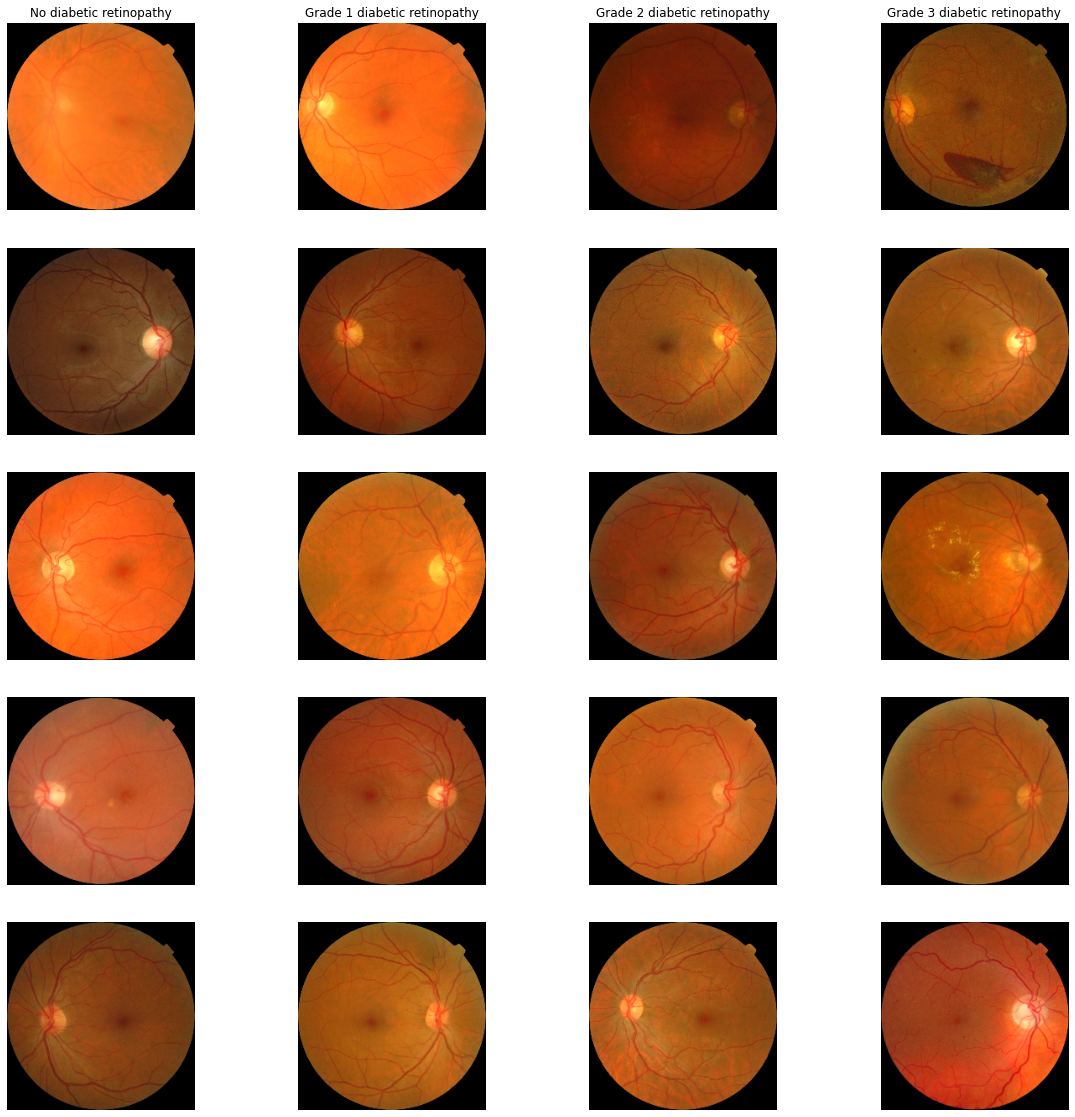

In [18]:
fig,axes = plt.subplots(5,4,figsize=(20,20))

for i in range(5):
    
    axes[i,0].imshow(unfilteredNoDR[i])
    axes[i,0].axis('off')
    axes[0,0].set_title('No diabetic retinopathy')
    
    axes[i,1].imshow(unfilteredGrade1[i])
    axes[i,1].axis('off')
    axes[0,1].set_title('Grade 1 diabetic retinopathy')
    
    axes[i,2].imshow(unfilteredGrade2[i])
    axes[i,2].axis('off')
    axes[0,2].set_title('Grade 2 diabetic retinopathy')
    
    axes[i,3].imshow(unfilteredGrade3[i])
    axes[i,3].axis('off')
    axes[0,3].set_title('Grade 3 diabetic retinopathy')
    
plt.savefig('../figures/unfiltered_images.png')

# Gray Images

In [25]:
grayscaleNoDR = open_image('../data/MESSIDOR_images/grayscale/binary_classification/NoDR/*')
grayscaleGrade1 = open_image('../data/MESSIDOR_images/grayscale/grayscaleGrade1/*')
grayscaleGrade2 = open_image('../data/MESSIDOR_images/grayscale/grayscaleGrade2/*')
grayscaleGrade3 = open_image('../data/MESSIDOR_images/grayscale/grayscaleGrade3/*')

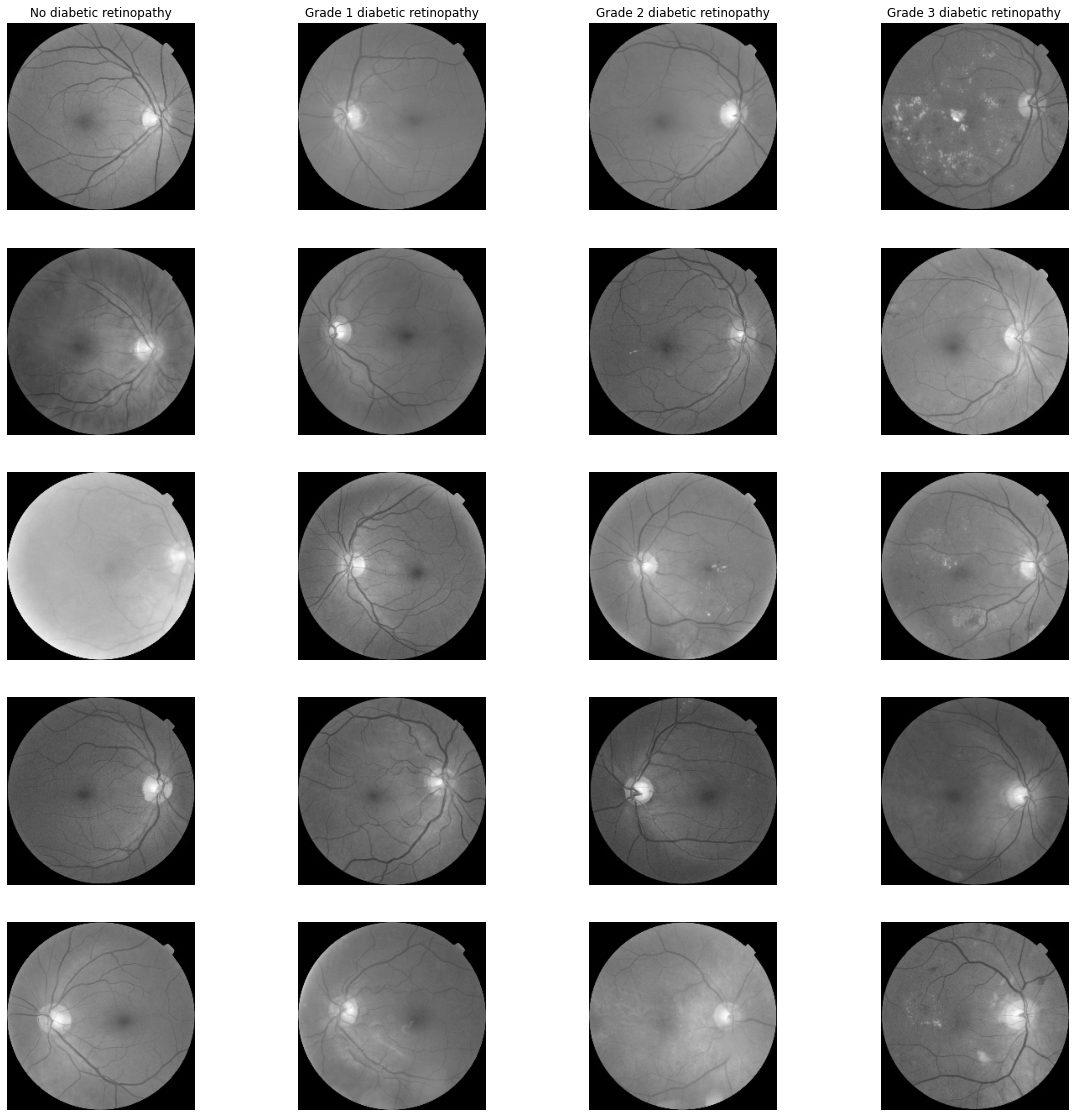

In [26]:
fig,axes = plt.subplots(5,4,figsize=(20,20))

for i in range(5):
    
    axes[i,0].imshow(np.array(grayscaleNoDR[i]), cmap='gray')
    axes[i,0].axis('off')
    axes[0,0].set_title('No diabetic retinopathy')

    axes[i,1].imshow(np.array(grayscaleGrade1[i]), cmap='gray')
    axes[i,1].axis('off')
    axes[0,1].set_title('Grade 1 diabetic retinopathy')

    axes[i,2].imshow(np.array(grayscaleGrade2[i]), cmap='gray')
    axes[i,2].axis('off')
    axes[0,2].set_title('Grade 2 diabetic retinopathy')

    axes[i,3].imshow(np.array(grayscaleGrade3[i]), cmap='gray')
    axes[i,3].axis('off')
    axes[0,3].set_title('Grade 3 diabetic retinopathy')
    
plt.savefig('../figures/grayscale_images.png')

# Filtered Images

In [29]:
filteredNoDR = open_image('../data/MESSIDOR_images/filtered/binary_classification/NoDR/*')
filteredGrade1 = open_image('../data/MESSIDOR_images/filtered/filteredGrade1/*')
filteredGrade2 = open_image('../data/MESSIDOR_images/filtered/filteredGrade2/*')
filteredGrade3 = open_image('../data/MESSIDOR_images/filtered/filteredGrade3/*')

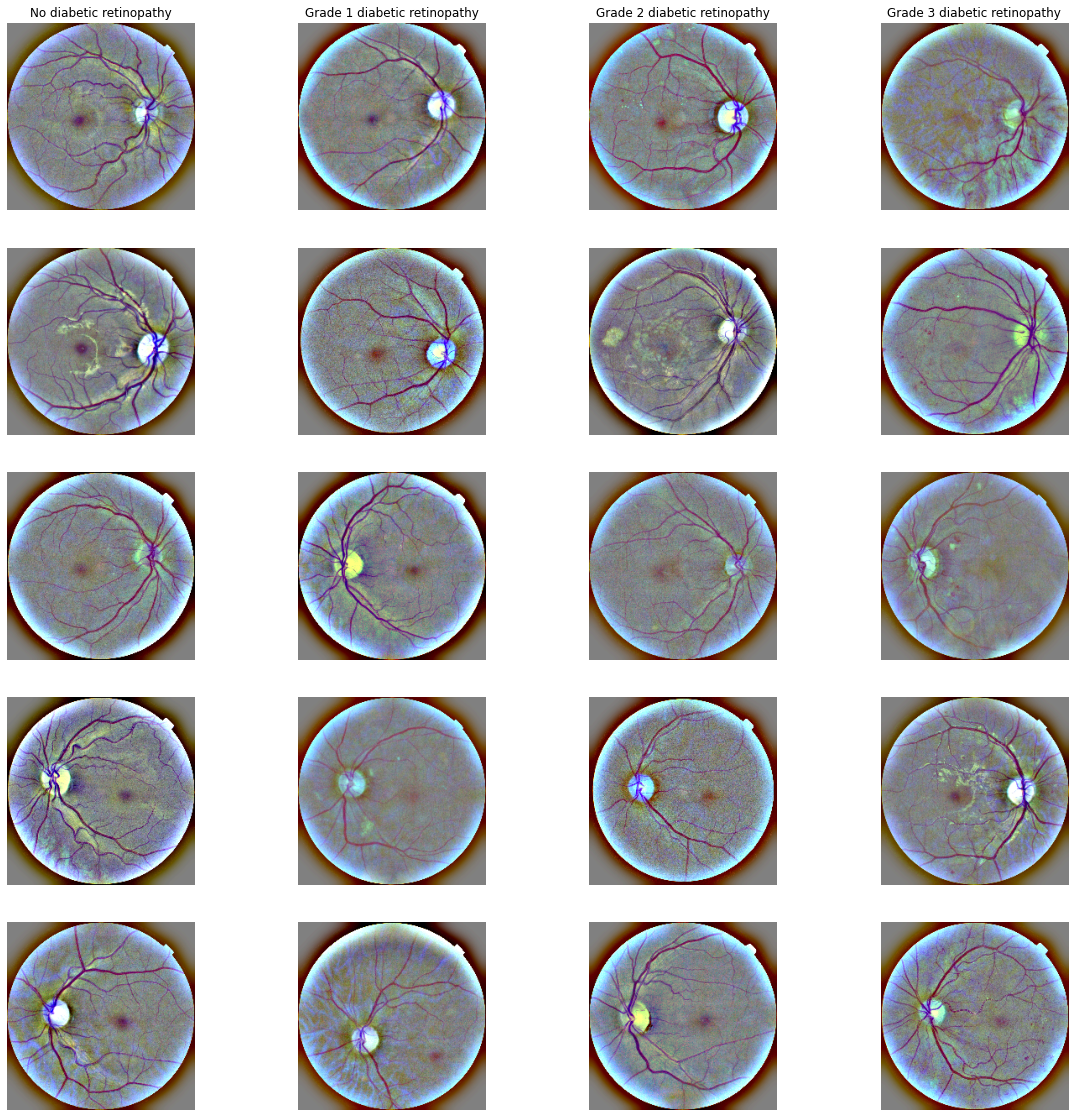

In [30]:
fig,axes = plt.subplots(5,4,figsize=(20,20))

for i in range(5):
    
    axes[i,0].imshow(filteredNoDR[i])
    axes[i,0].axis('off')
    axes[0,0].set_title('No diabetic retinopathy')
    
    axes[i,1].imshow(filteredGrade1[i])
    axes[i,1].axis('off')
    axes[0,1].set_title('Grade 1 diabetic retinopathy')
    
    axes[i,2].imshow(filteredGrade2[i])
    axes[i,2].axis('off')
    axes[0,2].set_title('Grade 2 diabetic retinopathy')
    
    axes[i,3].imshow(filteredGrade3[i])
    axes[i,3].axis('off')
    axes[0,3].set_title('Grade 3 diabetic retinopathy')
    
plt.savefig('../figures/filtered_images.png')

In [31]:
def plot_comparison(image1, image2, cmap=None):
    """Plots two images for comparison"""
    fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(16,12), sharex=True, sharey=True)
    
    ax1.imshow(image1, cmap=cmap)
    ax1.set_title('No Diabetic Retinopathy')
    ax1.axis('off')
    
    ax2.imshow(image2, cmap=cmap)
    ax2.set_title('Diabetic Retinopathy')
    ax2.axis('off')

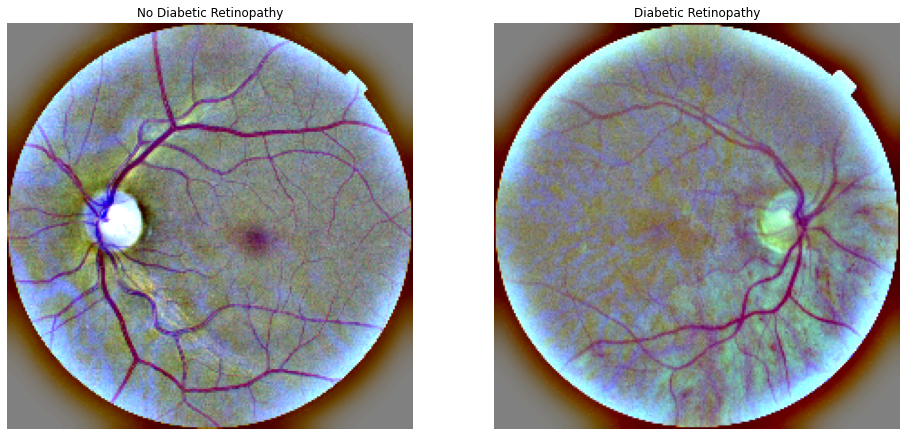

In [32]:
plot_comparison(filteredNoDR[4], filteredGrade3[0])
plt.savefig('../figures/filtered_comparison.png')

# Sobel Images

In [33]:
def to_sobel(image):
    """Applies sobel filter"""
    
    sobel_image = sobel(image)
    
    return sobel_image

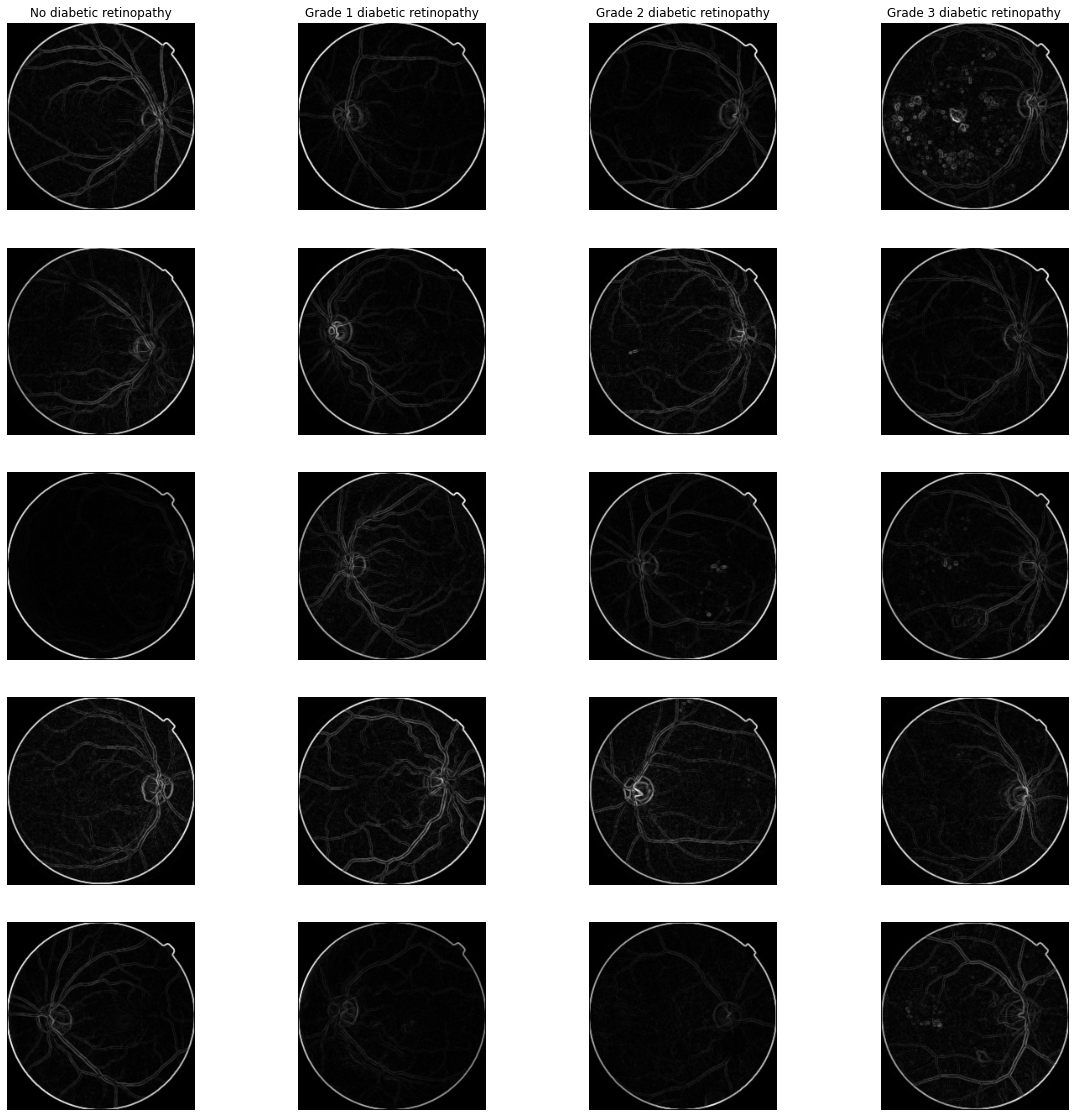

In [34]:
fig,axes = plt.subplots(5,4,figsize=(20,20))

for i in range(5):
    
    axes[i,0].imshow(to_sobel(np.array(grayscaleNoDR[i])), cmap='gray')
    axes[i,0].axis('off')
    axes[0,0].set_title('No diabetic retinopathy')

    axes[i,1].imshow(to_sobel(np.array(grayscaleGrade1[i])), cmap='gray')
    axes[i,1].axis('off')
    axes[0,1].set_title('Grade 1 diabetic retinopathy')

    axes[i,2].imshow(to_sobel(np.array(grayscaleGrade2[i])), cmap='gray')
    axes[i,2].axis('off')
    axes[0,2].set_title('Grade 2 diabetic retinopathy')

    axes[i,3].imshow(to_sobel(np.array(grayscaleGrade3[i])), cmap='gray')
    axes[i,3].axis('off')
    axes[0,3].set_title('Grade 3 diabetic retinopathy')
    
plt.savefig('../figures/sobel_images.png')

# Canny Images

In [35]:
def to_canny(image, sigma=0.7):
    """Applies canny filter"""
    
    canny_image = canny(image, sigma=sigma)
    
    return canny_image

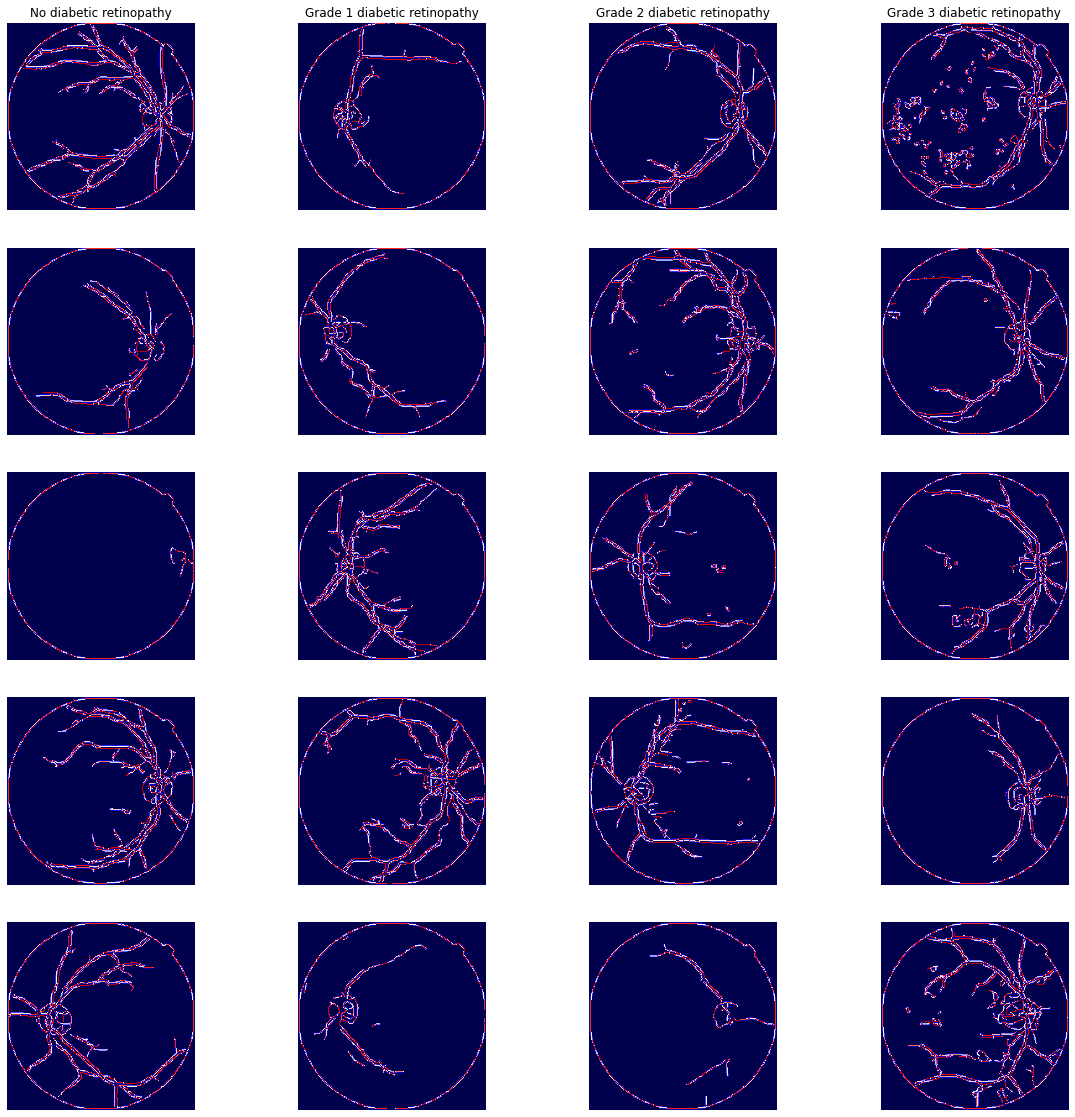

In [36]:
fig,axes = plt.subplots(5,4,figsize=(20,20))

for i in range(5):
    
    axes[i,0].imshow(to_canny(np.array(grayscaleNoDR[i])), cmap='seismic')
    axes[i,0].axis('off')
    axes[0,0].set_title('No diabetic retinopathy')

    axes[i,1].imshow(to_canny(np.array(grayscaleGrade1[i])), cmap='seismic')
    axes[i,1].axis('off')
    axes[0,1].set_title('Grade 1 diabetic retinopathy')

    axes[i,2].imshow(to_canny(np.array(grayscaleGrade2[i])), cmap='seismic')
    axes[i,2].axis('off')
    axes[0,2].set_title('Grade 2 diabetic retinopathy')

    axes[i,3].imshow(to_canny(np.array(grayscaleGrade3[i])), cmap='seismic')
    axes[i,3].axis('off')
    axes[0,3].set_title('Grade 3 diabetic retinopathy')
    
plt.savefig('../figures/canny_images.png')

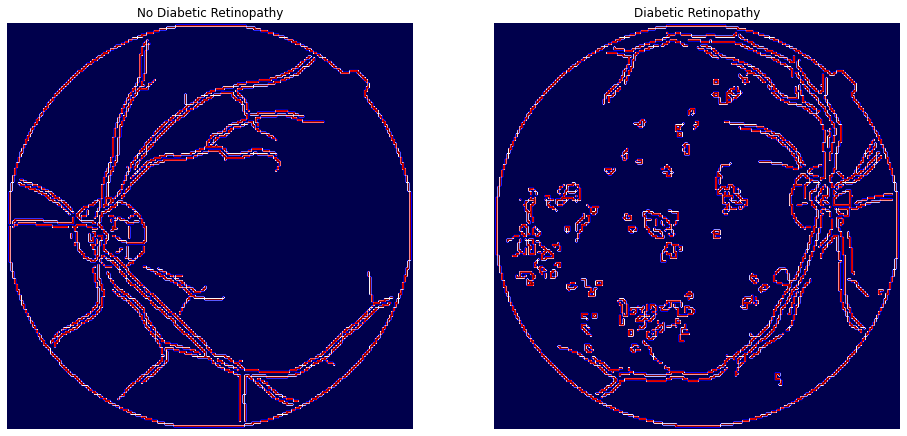

In [37]:
plot_comparison(to_canny(np.array(grayscaleNoDR[4])), to_canny(np.array(grayscaleGrade3[0])), cmap='seismic')
plt.savefig('../figures/canny_comparison.png')